<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/pretrained_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Pretrained Models in an app

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


Today we will use a dataset to determine whether or not an image is a hotdog.  Dataset link: [link](https://drive.google.com/drive/folders/1d2SelwjIGAtYnui_yczzaTL61eF_oLH_?usp=sharing)

**BEGINNING**: To get started, you and your partner should create a basic streamlit app that accepts an image from the user and displays it on the screen.

In [ ]:
ls

drive/  sample_data/


In [ ]:
test_path = '/content/drive/MyDrive/hotdogs/data/hotdog-nothotdog/test/hotdog/1501.jpg'

In [ ]:
import matplotlib.pyplot as plt

array([[[ 60,  61,  45],
        [ 47,  47,  37],
        [ 30,  26,  27],
        ...,
        [  4,  16,  12],
        [  0,  12,   8],
        [  1,  13,  11]],

       [[ 84,  87,  76],
        [ 67,  68,  60],
        [ 27,  26,  24],
        ...,
        [  1,  11,  10],
        [  1,  13,  11],
        [  5,  15,  16]],

       [[ 94, 105, 101],
        [ 68,  75,  68],
        [ 33,  35,  24],
        ...,
        [  1,   9,  11],
        [  3,  12,  17],
        [  6,  13,  21]],

       ...,

       [[140, 139, 118],
        [134, 134, 108],
        [139, 143, 108],
        ...,
        [122, 119,  68],
        [122, 118,  71],
        [109, 104,  74]],

       [[131, 133, 112],
        [129, 131, 107],
        [128, 134,  98],
        ...,
        [123, 117,  69],
        [119, 111,  72],
        [107,  96,  76]],

       [[126, 125, 107],
        [129, 131, 107],
        [120, 126,  88],
        ...,
        [121, 113,  66],
        [112, 100,  62],
        [102,  87,  68]]], dtype=uint8)
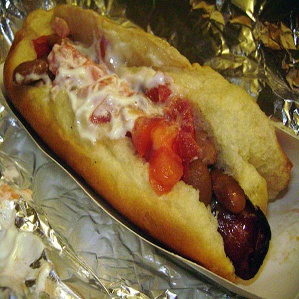

In [ ]:
plt.imread(test_path)

#### Pretrained Models

There are a few places we may get pretrained networks.

- Keras Applications
- Torchvision
- PyTorch Hub
- [Model Zoo](https://modelzoo.co/)
- [Huggingface](https://huggingface.co/models)

We will focus on the first three here today, but you will be encouraged to explore additional examples in the homework.

**Example**: ResNet

- [link](https://keras.io/api/applications/#usage-examples-for-image-classification-models)

```
import streamlit as st
import numpy as np
from torchvision.models import
import torch



st.header('Hot Dogs!')

uploaded_file = st.file_uploader("Pick a picture")
model = ''

if uploaded_file is not None:
    st.image(uploaded_file)
    img = #load the image
    #prepare the image
    #pass through the model
    #make prediction
    #lookup category
    
```

**Example 2**: `torchvision`

- [Link](https://pytorch.org/vision/stable/models.html)

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [ ]:
# Initialize the Weight Transforms
#prepare an image for the model
weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()

In [ ]:
img = '309.jpg'

In [ ]:
from PIL import Image

In [ ]:
im = Image.open(img)

In [ ]:
img_for_model = preprocess(im)

In [ ]:
type(img_for_model)

torch.Tensor

In [ ]:
prediction = model(img_for_model.unsqueeze(dim = 0))
class_id = prediction.squeeze(0).softmax(0).argmax().item()
print(class_id)
# score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}")

676
muzzle


**Example 3**: Torch Hub

- [Link](https://pytorch.org/hub/)

In [ ]:
import torch

# Model
model = torch.hub.load('facebookresearch/WSL-Images', 'resnext101_32x8d_wsl')

Downloading: "https://github.com/facebookresearch/WSL-Images/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth
100%|██████████| 340M/340M [00:00<00:00, 359MB/s]


In [ ]:
efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn

ModuleNotFoundError: No module named 'validators'

In [ ]:
pip install https://github.com/hustvl/YOLOP/blob/main/requirements.txt

     - 315.4 kB 47.9 MB/s 0:00:00
  ERROR: Cannot unpack file /tmp/pip-unpack-kf6zaxn0/requirements.txt (downloaded from /tmp/pip-req-build-8u28r5ql, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-8u28r5ql


In [ ]:
filename = ''

In [ ]:
from PIL import Image
from torchvision import transforms
input_image = Image.open('/content/drive/MyDrive/hotdogs/data/hotdog-nothotdog/test/hotdog/1501.jpg')
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)





IndexError: too many indices for tensor of dimension 2

In [ ]:
# pip install validators

In [ ]:
imgs = ['309.jpg', '1823.jpg']

In [ ]:
batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in imgs]
)

In [ ]:
with torch.no_grad():
    output = torch.nn.functional.softmax(efficientnet(batch), dim=1)

results = utils.pick_n_best(predictions=output, n=5)

AttributeError: ignored

Find a model that interests you from any of the pretrained examples in either the model zoo or huggingface library.  What could you do with this?  Demonstrate its use with an example below.

Now you want to incorporate your model into the streamlit app from earlier.  Can you take your image the user uploaded, pass through a pretrained model, and display the results of the classification problem?

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
model_name = "nvidia/Llama-3.1-Nemotron-70B-Instruct-HF"
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.bfloat16, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_name)

prompt = "How many r in strawberry?"
messages = [{"role": "user", "content": prompt}]

tokenized_message = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt", return_dict=True)
response_token_ids = model.generate(tokenized_message['input_ids'].cuda(),attention_mask=tokenized_message['attention_mask'].cuda(),  max_new_tokens=4096, pad_token_id = tokenizer.eos_token_id)
generated_tokens =response_token_ids[:, len(tokenized_message['input_ids'][0]):]
generated_text = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]
print(generated_text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/930 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/59.6k [00:00<?, ?B/s]

model-00001-of-00030.safetensors:   0%|          | 0.00/4.58G [00:00<?, ?B/s]

model-00002-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00003-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00005-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00006-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00007-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00008-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00009-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00010-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00011-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00012-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00013-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00014-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00015-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00016-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00017-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:653: UserWarning: Not enough free disk space to download the file. The expected file size is: 4999.71 MB. The target location /root/.cache/huggingface/hub/models--nvidia--Llama-3.1-Nemotron-70B-Instruct-HF/blobs only has 4888.43 MB free disk space.
  warnings.warn(


model-00018-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

OSError: [Errno 28] No space left on device